In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# titanic 데이터프레임의 index와 같음
passengerid_test = test.PassengerId

# 결측치를 더 정확하게 채우기 위해 train과 test를 합친다.
titanic = train.append(test, ignore_index=True, sort=True)

In [4]:
# 나중에 다시 train과 test를 분리하기 위해 각각의 idx를 저장한다.
train_idx = len(train)
test_idx = len(titanic) - len(train)

train_idx, test_idx

(891, 418)

In [5]:
titanic

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## 결측치
- `Age` : train 177, test 86, total 263
- `Fare` : test 1
- `Cabin` : train 687, test 327, total 1,014
- `Embarked` : train 2

#### 1. `Embarked`
- `Embarked` 컬럼은 범주형이므로 가장 많은 값으로 결측치를 채운다.

In [7]:
titanic.groupby('Embarked').count().PassengerId

Embarked
C    270
Q    123
S    914
Name: PassengerId, dtype: int64

In [8]:
most_embarked = titanic.Embarked.value_counts().index[0]
titanic.Embarked = titanic.Embarked.fillna(most_embarked) # 결측치 채우기
titanic.groupby('Embarked').count().PassengerId

Embarked
C    270
Q    123
S    916
Name: PassengerId, dtype: int64

#### 2. `Fare` 
- `Fare` 컬럼은 연속형이므로 중간값으로 결측치를 채운다.

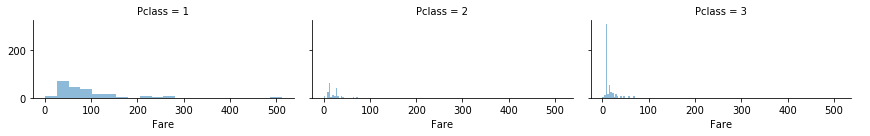

In [9]:
# Age와 Pclass에 따른 생존율의 차이를 알아본다.

grid = sns.FacetGrid(train, col='Pclass'
                   ,height=2, aspect=2)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend()

In [10]:
titanic[titanic.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [11]:
# Pclass에 따라 Fare의 차이가 있다.
titanic.groupby('Pclass').Fare.median()  

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [12]:
# Fare 결측치가 있는 승객은 3등실에 있으므로, 3등실 Fare의 medain 값으로 결측치를 채운다.
median_fare_pclass3 = titanic[titanic.Pclass==3].Fare.median()
titanic.Fare = titanic.Fare.fillna(median_fare_pclass3)

#### 3. Cabin
- Cabin은 결측치가 많으므로 머신러닝을 사용해서 나중에 채운다. 먼저 NaN 값을 U값으로 채운다.
- Cabin의 앞글자 알파벳만 따와 새로운 컬럼 Deck에 저장하고, Cabin 컬럼은 삭제한다.

In [13]:
titanic.Cabin = titanic.Cabin.fillna('U')

In [14]:
titanic['Deck'] = titanic['Cabin'].str[:1]
titanic.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,U
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,U


In [15]:
titanic.Deck.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:
titanic.drop('Cabin', axis=1, inplace=True)

#### 4. Age
- Age 값은 Name 컬럼의 Mrs.Ms.등등 Title에 따라서 값이 달라질 것으로 예상된다.
- 먼저 Title 컬럼을 만들고 각각의 median값으로 결측치를 채워넣는다.

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Deck           1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [18]:
titanic.Name[:10]   

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [19]:
# Name 칼럼의 중간 지점에 있는 Mr., Mrs. 등을 추출하여 Title 컬럼을 만든다.
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [20]:
titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [21]:
# null 값은 없다.
titanic.Title.isnull().sum()

0

In [22]:
titanic.groupby('Title').count().sort_values('PassengerId', ascending=False)['PassengerId']

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: PassengerId, dtype: int64

In [23]:
# 타이틀 매핑
standardized_titles = {
    "Mr" :        "Mr"
    ,"Miss" :      "Miss"
    ,"Mrs" :       "Mrs"
    ,"Master" :    "Master"
    ,"Rev":        "Officer"
    ,"Dr":         "Officer"
    ,"Col":        "Officer"
    ,"Major":      "Officer"
    ,"Mlle":       "Miss"
    ,"Sir" :       "Royalty"
    ,"Ms":         "Mrs"
    ,"Capt":       "Officer"
    ,"Mme":        "Mrs"
    ,"Lady" :      "Royalty"
    ,"Jonkheer":   "Royalty"
    ,"Dona":       "Royalty"
    ,"Don":        "Royalty"
    ,"the Countess":"Royalty" 
}

titanic.Title = titanic.Title.map(standardized_titles)
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [24]:
corr = titanic.corr()
corr['Age']

Age            1.000000
Fare           0.177286
Parch         -0.150917
PassengerId    0.028814
Pclass        -0.408106
SibSp         -0.243699
Survived      -0.077221
Name: Age, dtype: float64

- Age와 관련이 높은 특성은 Pclass이다. 
- 또한 Title, Sex와 연관이 있을 것으로 예상되므로 이를 이용해 group을 만든다.

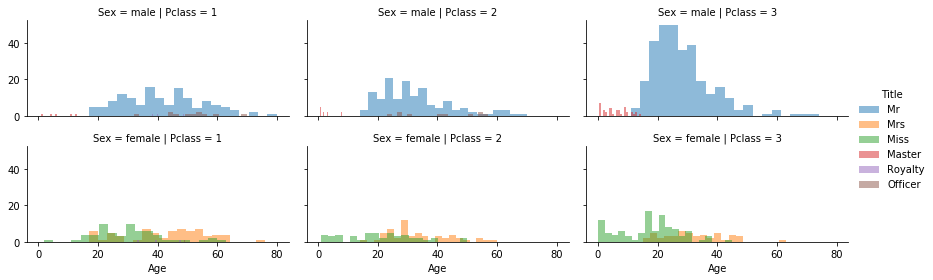

In [25]:
grid = sns.FacetGrid(titanic, col='Pclass', row='Sex', hue='Title'
                   ,height=2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

예상대로 Title대로 Age가 나눠지는 것을 확인할 수 있다. <br>
Sex,Pclass,Title로 그룹을 짓고 각각의 median 값으로 fillna 메소드를 실행한다.

In [26]:
spt = titanic.groupby(['Sex','Pclass', 'Title'])  
spt_count = spt.Age.count()
spt_median = spt.Age.median()
spt_std = spt.Age.std()
age_null = titanic[titanic.Age.isnull()].groupby(['Sex','Pclass', 'Title']).count()['PassengerId']
spt_df = pd.DataFrame({'count':spt_count
                       ,'median':spt_median
                       ,'std':spt_std
                       ,'age_null_num':age_null})
spt_df

count  median        std  age_null_num
Sex    Pclass Title                                          
female 1      Miss        61    30.0  11.528914           1.0
              Mrs         68    45.0  14.122403          10.0
              Officer      1    49.0        NaN           NaN
              Royalty      3    39.0   7.549834           NaN
       2      Miss        48    20.0  12.207963           2.0
              Mrs         55    30.0  10.422005           1.0
       3      Miss       103    18.0   9.935434          47.0
              Mrs         49    31.0  10.194745          17.0
male   1      Master       5     6.0   4.974061           NaN
              Mr         132    41.5  13.489020          27.0
              Officer     11    52.0   9.689732           1.0
              Royalty      3    40.0   5.859465           NaN
       2      Master      11     2.0   2.723942           NaN
              Mr         137    30.0  11.862038          13.0
              Officer     10    41.5  12.927576           NaN
       3      Master      37     6.0   4.152566           8.0
              Mr         312    26.0   9.907858         136.0

In [27]:
# 결측치 채우기
titanic.Age = spt.Age.apply(lambda x: x.fillna(x.median()))

# 범주화

In [28]:
titanic.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,U,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,U,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,U,Mr


### 1. Sex
- Sex 컬럼을 int 타입으로 변환한다.

In [29]:
#genders = {"male": 0, "female": 1}

#titanic['Sex'] = titanic['Sex'].map(genders)

### 2. Name
- Last Name이 같으면 가족 그룹이라고 간주할 수 있으므로 Lname 컬럼을 새로 만들고, Name 컬럼은 삭제한다.

In [29]:
titanic['Lname'] = titanic['Name'].str.extract('([A-Za-z]+),',expand=False)
titanic.drop('Name',axis=1,inplace=True)
titanic.head(3)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,U,Mr,Braund
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,Mrs,Cumings
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,U,Miss,Heikkinen


### 3. Family, Single
- SibSp + Parch = Family
- Family 컬럼 값이 0인 승객은 single로 간주하고 single=1 값을 준다. (가족과 함께 온 승객은 single=0이다.)
- Group 컬럼을 생성하여 함께 온 그룹의 사이즈를 저장한다.
- 가족 그룹은 Family 사이즈를 Group 사이즈로 간주한다.

In [30]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

titanic.loc[titanic['Family'] > 0, 'Single'] = 0
titanic.loc[titanic['Family'] == 0, 'Single'] = 1
titanic['Single'] = titanic['Single'].astype(int)

titanic['Group'] = titanic['Family']

In [31]:
titanic.Single.value_counts()  # 혼자 온 승객이 790명으로 분류된다.

1    790
0    519
Name: Single, dtype: int64

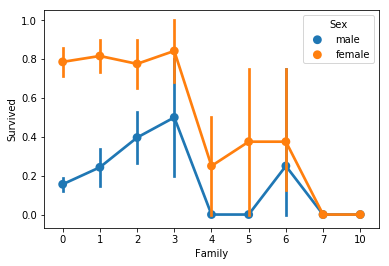

In [32]:
# family size에 따른 생존율을 알아본다.
axes = sns.pointplot('Family', 'Survived', hue='Sex'
                     ,data=titanic, aspect=2.5)

In [33]:
titanic.groupby('Family').count()['PassengerId']

Family
0     790
1     235
2     159
3      43
4      22
5      25
6      16
7       8
10     11
Name: PassengerId, dtype: int64

## 4. Group 찾기
- 같은 티켓으로 승선한 승객은 같은 그룹이라고 분류할 수 있다.
- 같은 Lname은 가족끼리 함께 온 그룹으로 분류할 수 있다.

In [34]:
# 2명 이상의 표를 끊은 티켓의 번호를 저장한다.
tgroup = titanic.groupby('Ticket').count()
multitickets = tgroup[tgroup['PassengerId']>1].index.to_list()
df_multitickets = titanic[titanic.Ticket.isin(multitickets)]

In [79]:
# 2명 이상의 표를 끊은 티켓은 총 216개이다. 
len(multitickets)

216

In [35]:
# 각 티켓으로 끊은 표의 수를 count하여, 티켓 번호를 key로 하는 딕셔너리를 저장한다.
multitickets_groupsize = df_multitickets.groupby('Ticket').count()['PassengerId'].to_dict()

# 각 티켓번호로 group size를 매칭한다.
titanic['tgroup'] = titanic.Ticket.map(multitickets_groupsize)-1  # 1을 빼서 자신을 제외하고 함께 온 사람의 수만 저장한다.
titanic.head(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,U,Mr,Braund,1,0,1,NaN
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,Mrs,Cumings,1,0,1,1.0
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,U,Miss,Heikkinen,0,1,0,NaN
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,C,Mrs,Futrelle,1,0,1,1.0
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,U,Mr,Allen,0,1,0,NaN
5,26.0,Q,8.4583,0,6,3,male,0,0.0,330877,U,Mr,Moran,0,1,0,NaN
6,54.0,S,51.8625,0,7,1,male,0,0.0,17463,E,Mr,McCarthy,0,1,0,1.0
7,2.0,S,21.0750,1,8,3,male,3,0.0,349909,U,Master,Palsson,4,0,4,4.0
8,27.0,S,11.1333,2,9,3,female,0,1.0,347742,U,Mrs,Johnson,2,0,2,2.0
9,14.0,C,30.0708,0,10,2,female,1,1.0,237736,U,Mrs,Nasser,1,0,1,1.0


In [36]:
# tgroup의 Nan은 0으로 채운다.
titanic.tgroup = titanic.tgroup.fillna(0)
titanic.tgroup = titanic.tgroup.astype(int)

In [37]:
# multitickets으로 온 승객들 중 Single=1로 처리된 승객이 127명이나 된다. 
df_multitickets[df_multitickets.Single==1].shape

(127, 16)

In [38]:
titanic[titanic.tgroup>titanic.Group].sort_values('Ticket')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup
504,16.00,S,86.5000,0,505,1,female,0,1.0,110152,B,Miss,Maioni,0,1,0,2
759,33.00,S,86.5000,0,760,1,female,0,1.0,110152,B,Royalty,Rothes,0,1,0,2
257,30.00,S,86.5000,0,258,1,female,0,1.0,110152,B,Miss,Cherry,0,1,0,2
475,41.50,S,52.0000,0,476,1,male,0,0.0,110465,A,Mr,Clifford,0,1,0,1
110,47.00,S,52.0000,0,111,1,male,0,0.0,110465,C,Mr,Porter,0,1,0,1
815,41.50,S,0.0000,0,816,1,male,0,0.0,112058,B,Mr,Fry,0,1,0,1
1263,49.00,S,0.0000,0,1264,1,male,0,NaN,112058,B,Mr,Ismay,0,1,0,1
83,28.00,S,47.1000,0,84,1,male,0,0.0,113059,U,Mr,Carrau,0,1,0,1
1294,17.00,S,47.1000,0,1295,1,male,0,NaN,113059,U,Mr,Carrau,0,1,0,1
377,27.00,C,211.5000,2,378,1,male,0,0.0,113503,C,Mr,Widener,2,0,2,4


In [39]:
# tgroup이 있는 승객 중 Single=1로 처리된 승객은 Single=0으로 바꿔준다.
titanic.loc[titanic['tgroup'] > 0, 'Single'] = 0

# tgroup이 Group보다 큰 경우에는 Group 컬럼을 tgroup 값으로 변경해준다.
titanic.loc[titanic['tgroup'] > titanic['Group'], 'Group'] = titanic['tgroup']

In [40]:
# Single=1로 분류된 승객이 790명에서 663명으로 줄었다.
titanic.groupby('Single').count().PassengerId

Single
0    646
1    663
Name: PassengerId, dtype: int64

In [41]:
titanic.groupby('Group').count().PassengerId

Group
0     663
1     263
2     186
3      71
4      37
5      25
6      37
7      16
10     11
Name: PassengerId, dtype: int64

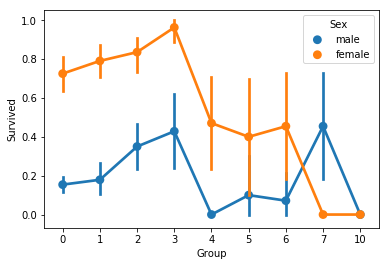

In [42]:
# Group size에 따른 생존율을 알아본다.
axes = sns.pointplot('Group', 'Survived', hue='Sex'
                     ,data=titanic, aspect=2.5)

#### 같은 방식으로 Lname이 같은 승객들은 함께 탑승한 가족의 그룹이라고 간주한다.
- Ticket을 함께 끊으면 같이 온 그룹이 확실하지만 Lname이 같다고 해서 다 같은 그룹이라고 하기는 어렵다.
- 따라서 Ticket 번호는 같지 않지만 Lname이 같은 승객들만을 대상으로 그룹핑을 한다.

In [43]:
# Lname이 같은 그룹을 저장한다.
lgroup = titanic.groupby('Lname').count()
multiLname = lgroup[lgroup['PassengerId']>1].index.to_list()
len(multiLname)

239

In [44]:
# multiLname으로 온 승객들 중 Single=1로 처리된 승객은 153명이다.
titanic[(titanic.Lname.isin(multiLname))&(titanic.Single==1)].shape

(153, 17)

In [45]:
# 티켓 번호는 같지 않지만 Lname이 같은 승객들은 총 192명이다.
df_diffrentTicket_sameLname = \
titanic[(~titanic.Ticket.isin(multitickets))&(titanic.Lname.isin(multiLname))].sort_values('Lname')

# Lname만 따로 저장한다.
differentTicket_sameLname_Lnamelist = df_diffrentTicket_sameLname.Lname.unique()

In [46]:
# Lname이 같은 승객들의 데이터를 살펴보면 같이 온 듯한 그룹도 있고, Pclass와 Embarked가 달라 따로 온 듯한 그룹도 있다.
titanic[titanic.Lname.isin(differentTicket_sameLname_Lnamelist)].sort_values('Lname')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup
948,25.00,S,7.6500,0,949,3,male,0,NaN,348122,F,Mr,Abelseth,0,1,0,0
1236,16.00,S,7.6500,0,1237,3,female,0,NaN,348125,U,Miss,Abelseth,0,1,0,0
210,24.00,S,7.0500,0,211,3,male,0,0.0,SOTON/O.Q. 3101311,U,Mr,Ali,0,1,0,0
784,25.00,S,7.0500,0,785,3,male,0,0.0,SOTON/O.Q. 3101312,U,Mr,Ali,0,1,0,0
4,35.00,S,8.0500,0,5,3,male,0,0.0,373450,U,Mr,Allen,0,1,0,0
730,29.00,S,211.3375,0,731,1,female,0,1.0,24160,B,Miss,Allen,0,0,3,3
119,2.00,S,31.2750,2,120,3,female,4,0.0,347082,U,Miss,Andersson,6,0,6,6
146,27.00,S,7.7958,0,147,3,male,0,1.0,350043,U,Mr,Andersson,0,1,0,0
850,4.00,S,31.2750,2,851,3,male,4,0.0,347082,U,Master,Andersson,6,0,6,6
542,11.00,S,31.2750,2,543,3,female,4,0.0,347082,U,Miss,Andersson,6,0,6,6


In [168]:
titanic.sort_values('Ticket')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup,lgroup
504,16.0,S,86.5000,0,505,1,female,0,1.0,110152,B,Miss,Maioni,0,0,2,2,0
257,30.0,S,86.5000,0,258,1,female,0,1.0,110152,B,Miss,Cherry,0,0,2,2,0
759,33.0,S,86.5000,0,760,1,female,0,1.0,110152,B,Royalty,Rothes,0,0,2,2,0
585,18.0,S,79.6500,2,586,1,female,0,1.0,110413,E,Miss,Taussig,2,0,2,2,0
262,52.0,S,79.6500,1,263,1,male,1,0.0,110413,E,Mr,Taussig,2,0,2,2,0
558,39.0,S,79.6500,1,559,1,female,1,1.0,110413,E,Mrs,Taussig,2,0,2,2,0
110,47.0,S,52.0000,0,111,1,male,0,0.0,110465,C,Mr,Porter,0,0,1,1,0
475,41.5,S,52.0000,0,476,1,male,0,0.0,110465,A,Mr,Clifford,0,0,1,1,0
1226,30.0,S,26.0000,0,1227,1,male,0,NaN,110469,C,Mr,Maguire,0,1,0,0,0
1049,42.0,S,26.5500,0,1050,1,male,0,NaN,110489,D,Mr,Borebank,0,1,0,0,0


In [47]:
# Lname과 Embarked가 같지만 Pclass가 다른 경우도 있다. 
# Lname이 Davies인 승객들은 2그룹으로 나뉘는 것 같다.
titanic[titanic.Lname=='Davies']

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup
385,18.0,S,73.50,0,386,2,male,0,0.0,S.O.C. 14879,U,Mr,Davies,0,0,6,6
549,8.0,S,36.75,1,550,2,male,1,1.0,C.A. 33112,U,Master,Davies,2,0,3,3
565,24.0,S,24.15,0,566,3,male,2,0.0,A/4 48871,U,Mr,Davies,2,0,2,2
900,21.0,S,24.15,0,901,3,male,2,NaN,A/4 48871,U,Mr,Davies,2,0,2,2
1038,22.0,S,8.05,0,1039,3,male,0,NaN,SC/A4 23568,U,Mr,Davies,0,1,0,0
1078,17.0,S,8.05,0,1079,3,male,2,NaN,A/4 48873,U,Mr,Davies,2,0,2,0
1221,48.0,S,36.75,2,1222,2,female,0,NaN,C.A. 33112,U,Mrs,Davies,2,0,3,3


In [48]:
print('Lname이 같지만 Ticket 번호가 다른 승객들의 총 수:'
      ,titanic[titanic.Lname.isin(differentTicket_sameLname_Lnamelist)].shape[0],'명'
     )
print('Lname으로만 그룹을 나눌 때:'
      ,len(titanic[titanic.Lname.isin(differentTicket_sameLname_Lnamelist)].groupby('Lname').count().PassengerId)
      ,'개 그룹'
     )
print('Lname,Pclass로 그룹을 나눌 때:'
      ,len(titanic[titanic.Lname.isin(differentTicket_sameLname_Lnamelist)].groupby(['Lname','Pclass']).count().PassengerId)
      ,'개 그룹'
     )
print('Lname,Pclass,Embarked로 그룹을 나눌 때:'
      ,len(titanic[titanic.Lname.isin(differentTicket_sameLname_Lnamelist)].groupby(['Lname','Pclass','Embarked']).count().PassengerId)
      ,'개 그룹'
     )

Lname이 같지만 Ticket 번호가 다른 승객들의 총 수: 288 명
Lname으로만 그룹을 나눌 때: 96 개 그룹
Lname,Pclass로 그룹을 나눌 때: 126 개 그룹
Lname,Pclass,Embarked로 그룹을 나눌 때: 132 개 그룹


In [49]:
# 따라서 Embarked, Pclass, Lname이 같을 때만 같이 온 가족의 그룹이라고 간주한다.
lgroup_map = titanic[titanic.Lname.isin(differentTicket_sameLname_Lnamelist)]\
            .groupby(['Lname','Pclass','Embarked']).count().PassengerId.sort_values(ascending=False)\
            .to_frame()
lgroup_alone = lgroup_map[lgroup_map.PassengerId==1]
lgroup_map = lgroup_map[lgroup_map.PassengerId>1]

In [50]:
# lgroup_alone은 Pclass와 Embarked은 다르지만 Lname이 같은 승객이 있었던 그룹이다.
lgroup_alone.rename(columns={'PassengerId':'lgroup'}, inplace=True)

# lgroup_map은 Lname,Pclass,Embarked 값이 모두 같아 같은 그룹으로 분류하기로 한 그룹이다.
lgroup_map.rename(columns={'PassengerId':'lgroup'}, inplace=True)

lgroup_map.head(3)

,,,lgroup
Lname,Pclass,Embarked,
Andersson,3,S,11
Asplund,3,S,8
Ford,3,S,6


In [51]:
# Lname, Pclass, Embarked를 index로 만들어서 lgroup_map과 titanic_lpe를 join한다.
titanic_lpe = titanic.set_index(['Lname','Pclass','Embarked'])
lgroup_map.join(titanic_lpe['PassengerId'], on=['Lname','Pclass','Embarked']).head()

lgroup  PassengerId
Lname     Pclass Embarked                     
Andersson 3      S             11           14
                 S             11           69
                 S             11          120
                 S             11          147
                 S             11          542

In [52]:
# 위에서처럼 join한 데이터프레임에서 PassengerId와 lgroup을 추출하여 딕셔너리로 만든다.
lgroup_dict = lgroup_map.join(titanic_lpe['PassengerId'], on=['Lname','Pclass','Embarked'])\
              .set_index('PassengerId')['lgroup'].to_dict()

# titanic 데이터의 PassengerId와 매핑한다.
titanic['lgroup'] = titanic.PassengerId.map(lgroup_dict)

In [53]:
# lgroup은 같이 온 승객의 수에 1이 더해진 값을 저장하고 있다. 따라서 1을 빼준다.
titanic.lgroup = titanic.lgroup - 1  

In [54]:
# lgroup의 Nan은 0으로 채운다.
titanic.lgroup = titanic.lgroup.fillna(0)
titanic.lgroup = titanic.lgroup.astype(int)

In [55]:
# 새로 만든 lgroup에서 Single=1로 처리되었었던 승객이 114명이었다.
titanic[(titanic.lgroup>0) & (titanic.Single==1)].shape

(114, 18)

In [56]:
# lgroup이 있는 승객 중 Single=1로 처리된 승객은 Single=0으로 바꿔준다.
titanic.loc[titanic['lgroup'] > 0, 'Single'] = 0

In [57]:
# Single=1로 분류된 승객이 663명에서 다시 549명으로 줄었다.
titanic.groupby('Single').count().PassengerId

Single
0    760
1    549
Name: PassengerId, dtype: int64

In [58]:
titanic.groupby('lgroup').count().PassengerId

lgroup
0     1068
1       94
2       63
3       48
4        5
5       12
7        8
10      11
Name: PassengerId, dtype: int64

In [59]:
# lgroup 값이 Group 값보다 큰 승객이 184명이다. 
titanic[titanic['lgroup']>titanic['Group']].shape

(184, 18)

In [60]:
# lgroup이 Group 값보다 크면 Group 값을 업데이트해준다.
titanic.loc[titanic['lgroup'] > titanic['Group'],'Group'] = titanic['lgroup']

In [61]:
# 그룹 별 생존율을 알아본다.
titanic.groupby('Group').count().PassengerId

Group
0     549
1     298
2     207
3     114
4      37
5      37
6      21
7      24
10     22
Name: PassengerId, dtype: int64

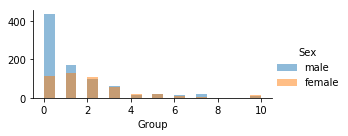

In [62]:
grid = sns.FacetGrid(titanic, hue='Sex'
                   ,height=2, aspect=2)
grid.map(plt.hist, 'Group', alpha=.5, bins=20)
grid.add_legend()

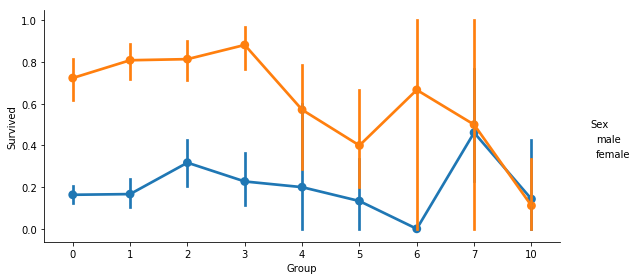

In [63]:
FacetGrid = sns.FacetGrid(titanic, hue='Sex', height=4, aspect=2)
FacetGrid.map(sns.pointplot, 'Group', 'Survived'
             ,palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

In [73]:
titanic[(titanic.Family>0)&(titanic.tgroup==0)&(titanic.lgroup==0)].sort_values('Family')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup,lgroup
40,40.0,S,9.4750,0,41,3,female,1,0.0,7546,U,Mrs,Ahlin,1,0,1,0,0
267,25.0,S,7.7750,0,268,3,male,1,1.0,347083,U,Mr,Persson,1,0,1,0,0
273,37.0,C,29.7000,1,274,1,male,0,0.0,PC 17596,C,Mr,Natsch,1,0,1,0,0
442,25.0,S,7.7750,0,443,3,male,1,0.0,347076,U,Mr,Petterson,1,0,1,0,0
664,20.0,S,7.9250,0,665,3,male,1,1.0,STON/O 2. 3101285,U,Mr,Lindqvist,1,0,1,0,0
892,47.0,S,7.0000,0,893,3,female,1,NaN,363272,U,Mrs,Wilkes,1,0,1,0,0
1295,43.0,C,27.7208,0,1296,1,male,1,NaN,17765,D,Mr,Frauenthal,1,0,1,0,0
136,19.0,S,26.2833,2,137,1,female,0,1.0,11752,D,Miss,Newsom,2,0,2,0,0
417,18.0,S,13.0000,2,418,2,female,0,1.0,250652,U,Miss,Silven,2,0,2,0,0
539,22.0,C,49.5000,2,540,1,female,0,1.0,13568,B,Miss,Frolicher,2,0,2,0,0


In [ ]:
titanic['group_idx'] = titanic[titanic['Group']>0]

In [66]:
titanic[titanic.Group==6]

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup,lgroup
50,7.0,S,39.6875,1,51,3,male,4,0.0,3101295,U,Master,Panula,5,0,6,6,0
72,21.0,S,73.5000,0,73,2,male,0,0.0,S.O.C. 14879,U,Mr,Hood,0,0,6,6,0
120,21.0,S,73.5000,0,121,2,male,2,0.0,S.O.C. 14879,U,Mr,Hickman,2,0,6,6,0
164,1.0,S,39.6875,1,165,3,male,4,0.0,3101295,U,Master,Panula,5,0,6,6,0
266,16.0,S,39.6875,1,267,3,male,4,0.0,3101295,U,Mr,Panula,5,0,6,6,0
311,18.0,C,262.3750,2,312,1,female,2,1.0,PC 17608,B,Miss,Ryerson,4,0,6,6,0
385,18.0,S,73.5000,0,386,2,male,0,0.0,S.O.C. 14879,U,Mr,Davies,0,0,6,6,2
638,41.0,S,39.6875,5,639,3,female,0,0.0,3101295,U,Mrs,Panula,5,0,6,6,0
655,24.0,S,73.5000,0,656,2,male,2,0.0,S.O.C. 14879,U,Mr,Hickman,2,0,6,6,0
665,32.0,S,73.5000,0,666,2,male,2,0.0,S.O.C. 14879,U,Mr,Hickman,2,0,6,6,0


In [67]:
corr = titanic.corr()
corr['Group'].sort_values()

Single        -0.629021
Age           -0.193294
PassengerId    0.008565
Pclass         0.025302
Survived       0.040992
Fare           0.368488
lgroup         0.517252
Parch          0.631320
SibSp          0.675873
Family         0.789621
tgroup         0.873503
Group          1.000000
Name: Group, dtype: float64

In [87]:
titanic[titanic.Lname=='Hart']

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup,lgroup
314,43.0,S,26.2500,1,315,2,0,1,0.0,F.C.C. 13529,U,Mr,Hart,2,0,2,2,2
411,26.0,Q,6.8583,0,412,3,0,0,0.0,394140,U,Mr,Hart,0,1,0,0,0
440,45.0,S,26.2500,1,441,2,1,1,1.0,F.C.C. 13529,U,Mrs,Hart,2,0,2,2,2
535,7.0,S,26.2500,2,536,2,1,0,1.0,F.C.C. 13529,U,Miss,Hart,2,0,2,2,2


In [88]:
# 컬럼 순서 변경
titanic = titanic[['PassengerId','Survived','Lname','Title','Age','Sex','Embarked','Ticket','Pclass','Deck'
                  ,'Fare','Parch','SibSp','Family','tgroup','lgroup','Group','Single']]

In [97]:
titanic.head(3)

,PassengerId,Survived,Lname,Title,Age,Sex,Embarked,Ticket,Pclass,Deck,Fare,Parch,SibSp,Family,tgroup,lgroup,Group,Single
0,1,0.0,Braund,Mr,22.0,0,S,A/5 21171,3,U,7.2500,0,1,1,0,1,1,0
1,2,1.0,Cumings,Mrs,38.0,1,C,PC 17599,1,C,71.2833,0,1,1,1,0,1,0
2,3,1.0,Heikkinen,Miss,26.0,1,S,STON/O2. 3101282,3,U,7.9250,0,0,0,0,0,0,1


### 5. Deck

#### 1. 티켓 번호가 같으면 같은 Deck에 머물렀다.

In [125]:
# Deck 값에 ffill(), bfill() 메소드를 적용하기 위해서 U 값을 다시 NaN으로 바꾼다.
titanic.loc[titanic.Deck=='U','Deck'] = np.nan

In [133]:
# Deck의 결측치는 1014였다.
titanic[titanic.Deck.isnull()].shape

(1014, 18)

In [137]:
titanic['Deck'] = titanic.groupby('Ticket',sort=True)['Deck'].ffill()
titanic['Deck'] = titanic.groupby('Ticket',sort=True)['Deck'].bfill()

In [138]:
# tgroup으로 묶어 결측치를 채웠을 때 16개의 값이 채워졌다.
titanic[titanic.Deck.isnull()].shape

(998, 19)

In [145]:
# 다시 NaN을 U로 채운다.
titanic.Deck = titanic.Deck.fillna('U')

#### 2. 티켓이 같은 승객들의 Fare는 합산하여 표기된다.

In [206]:
titanic[titanic.Ticket.isin(multitickets)].groupby(['Pclass','tgroup'])['Fare_per_tgroup','Fare'].describe()

Fare_per_tgroup                                                 \
                        count       mean           std        min        25%   
Pclass tgroup                                                                  
1      1                106.0  32.380114  1.064656e+01   0.000000  26.277100   
       2                 45.0  35.865922  1.489435e+01  25.576400  26.550000   
       3                 32.0  49.072787  3.226701e+01  23.375000  29.430206   
       4                 15.0  38.235000  8.406191e+00  26.900000  26.900000   
       5                 12.0  34.545833  9.700477e+00  25.258333  25.258333   
       6                  7.0  37.482143  0.000000e+00  37.482143  37.482143   
2      1                 74.0  11.797859  2.202838e+00   5.250000  10.500000   
       2                 39.0   8.929595  3.176382e+00   0.000000   8.666667   
       3                 16.0   9.067450  1.344503e+00   6.937500   8.625000   
       4                  5.0  13.000000  0.000000e+00  13.000000  13.000000   
       6                  7.0  10.500000  0.000000e+00  10.500000  10.500000   
3      1                 84.0   7.274679  1.155761e+00   4.258350   6.950000   
       2                 63.0   6.240673  1.351606e+00   3.711100   5.081933   
       3                 16.0   3.955206  2.390681e+00   0.000000   3.610931   
       4                 15.0   5.394447  1.145457e+00   4.215000   4.215000   
       5                 12.0   4.752083  1.066226e-01   4.650000   4.650000   
       6                 21.0   4.873810  5.766752e-01   4.467857   4.467857   
       7                 16.0   6.462238  6.194062e-01   5.862500   5.862500   
       10                11.0   6.322727  9.315294e-16   6.322727   6.322727   

                                                  Fare              \
                     50%        75%         max  count        mean   
Pclass tgroup                                                        
1      1       29.700000  38.643750   68.389600  106.0   64.760228   
       2       28.833333  37.758333   82.506933   45.0  107.597767   
       3       37.562500  53.486981  128.082300   32.0  196.291150   
       4       42.300000  45.505000   45.505000   15.0  191.175000   
       5       34.545833  43.833333   43.833333   12.0  207.275000   
       6       37.482143  37.482143   37.482143    7.0  262.375000   
2      1       13.000000  13.000000   15.035400   74.0   23.595719   
       2        8.750000  10.833333   13.000000   39.0   26.788785   
       3        9.468750   9.911200   10.394800   16.0   36.269800   
       4       13.000000  13.000000   13.000000    5.0   65.000000   
       6       10.500000  10.500000   10.500000    7.0   73.500000   
3      1        7.250000   8.050000    9.393750   84.0   14.549358   
       2        6.737500   7.452767    8.050000   63.0   18.722019   
       3        4.979162   5.323437    5.862500   16.0   15.820825   
       4        5.093340   6.875000    6.875000   15.0   26.972233   
       5        4.752083   4.854167    4.854167   12.0   28.512500   
       6        4.483929   5.669643    5.669643   21.0   34.116667   
       7        6.462238   7.061975    7.061975   16.0   51.697900   
       10       6.322727   6.322727    6.322727   11.0   69.550000   

                                                                          \
                        std       min         25%        50%         75%   
Pclass tgroup                                                              
1      1       2.129311e+01    0.0000   52.554200   59.40000   77.287500   
       2       4.468305e+01   76.7292   79.650000   86.50000  113.275000   
       3       1.290680e+02   93.5000  117.720825  150.25000  213.947925   
       4       4.203096e+01  134.5000  134.500000  211.50000  227.525000   
       5       5.820286e+01  151.5500  151.550000  207.27500  263.000000   
       6       0.000000e+00  262.3750  262.375000  262.37500  262.375000   
2      1       4.405675e+00 

In [200]:
# Fare를 tgroup으로 나눠본다.
titanic['Fare_per_tgroup'] = titanic.Fare / (titanic.tgroup + 1)

In [199]:
titanic[(titanic.Pclass==1)&(titanic.tgroup==3)].sort_values('Fare')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,Lname,Family,Single,Group,tgroup,lgroup
820,52.0,S,93.5000,1,821,1,female,1,1.0,12749,B,Mrs,Hays,2,0,3,3,0
1281,23.0,S,93.5000,0,1282,1,male,0,NaN,12749,B,Mr,Payne,0,0,3,3,0
1199,55.0,S,93.5000,1,1200,1,male,1,NaN,12749,B,Mr,Hays,2,0,3,3,0
520,30.0,S,93.5000,0,521,1,female,0,1.0,12749,B,Miss,Perreault,0,0,3,3,0
698,49.0,C,110.8833,1,699,1,male,1,0.0,17421,C,Mr,Thayer,2,0,3,3,0
581,39.0,C,110.8833,1,582,1,female,1,1.0,17421,C,Mrs,Thayer,2,0,3,3,0
550,17.0,C,110.8833,2,551,1,male,0,1.0,17421,C,Mr,Thayer,2,0,3,3,0
306,30.0,C,110.8833,0,307,1,female,0,1.0,17421,C,Miss,Fleming,0,0,3,3,0
435,14.0,S,120.0000,2,436,1,female,1,1.0,113760,B,Miss,Carter,3,0,3,3,0
802,11.0,S,120.0000,2,803,1,male,1,1.0,113760,B,Master,Carter,3,0,3,3,0


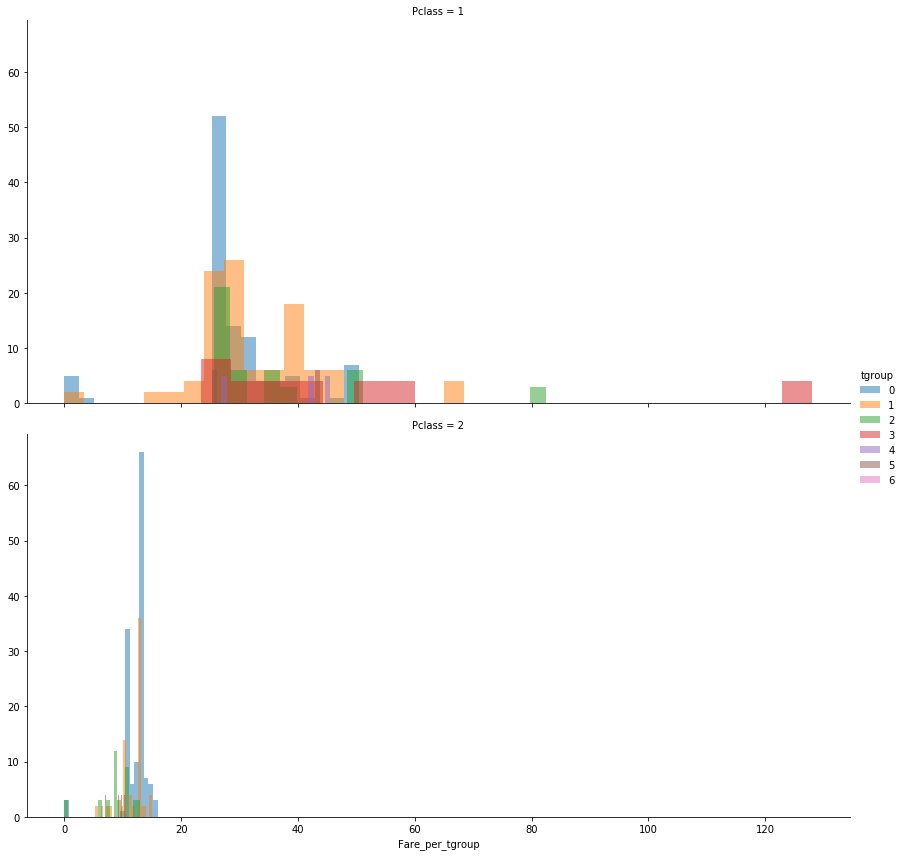

In [204]:
grid = sns.FacetGrid(titanic[titanic.Pclass!=3], row='Pclass', hue='tgroup'
                   ,height=6, aspect=2)
grid.map(plt.hist, 'Fare_per_tgroup', alpha=.5, bins=20)
grid.add_legend()

#### 2. Deck Pclass, Fare와 관련이 있다.

In [177]:
titanic[titanic.tgroup==0].groupby('Pclass').Fare.agg(['mean','median','count','std'])

,mean,median,count,std
Pclass,,,,
1,29.113715,27.7208,106,9.518051
2,12.176285,13.0000,136,2.295573
3,7.890295,7.8500,471,1.030799


In [178]:
titanic[(titanic.tgroup==0)&(titanic.Pclass==1)].groupby('Deck').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Deck,,,,,,,,
A,17.0,32.521812,10.939411,0.0000,29.70000,31.0000,35.5000,50.4958
B,12.0,29.334717,15.129310,0.0000,26.55000,29.8500,35.7500,50.4958
C,21.0,30.990676,6.750713,25.7000,26.55000,28.7125,30.5000,50.0000
D,11.0,28.456809,2.766014,25.9292,26.41665,27.7208,30.0000,34.0208
E,10.0,27.498750,3.876758,25.5875,26.28750,26.3375,26.5500,38.5000
T,1.0,35.500000,NaN,35.5000,35.50000,35.5000,35.5000,35.5000
U,34.0,26.672053,10.165535,0.0000,26.00000,26.5500,27.7208,49.5042


In [180]:
titanic[titanic.tgroup==0].groupby(['Embarked','Pclass']).Fare.describe()

count       mean        std      min       25%      50%  \
Embarked Pclass                                                            
C        1        37.0  32.169700   7.152371  25.7417  27.72080  29.7000   
         2        15.0  14.100267   1.028013  12.0000  13.82500  13.8625   
         3        57.0   7.250888   0.584346   4.0125   7.22500   7.2292   
Q        2         7.0  11.735114   1.090680   9.6875  11.52915  12.3500   
         3        91.0   7.716623   0.244534   6.7500   7.74585   7.7500   
S        1        69.0  27.474999  10.246828   0.0000  26.00000  26.5500   
         2       114.0  11.950219   2.355105   0.0000  10.50000  13.0000   
         3       323.0   8.052060   1.169477   3.1708   7.77500   7.8958   

                     75%      max  
Embarked Pclass                    
C        1       31.6792  50.4958  
         2       15.0458  15.5792  
         3        7.2292   8.7125  
Q        2       12.3500  12.3500  
         3        7.7500   8.4583  
S        1       30.5000  50.4958  
         2       13.0000  16.0000  
         3        8.0500  19.9667

In [169]:
titanic[titanic.Embarked=='C'].Ticket.unique()

array(['PC 17599', '237736', '2649', '2631', 'PC 17601', 'PC 17569',
       'PC 17604', '2677', '2651', '349253', 'SC/Paris 2123', '2662',
       'PC 17572', '113509', '2697', '2669', 'PC 17605', '2661', '2680',
       'PC 17754', 'PC 17759', '2665', '2627', 'PC 17558', '2668',
       '349241', 'SC/PARIS 2133', 'PC 17593', '2678', 'PC 17597', '17764',
       'PC 17595', 'SC/PARIS 2131', 'PC 17610', '2628', '2699', '112277',
       '35273', '11813', '2694', '2650', 'PC 17585', 'PC 17755',
       'PC 17596', '349239', '11967', 'SC/Paris 2163', 'PC 17612', '2693',
       '17421', 'PC 17758', 'P/PP 3381', 'PC 17485', '11767', 'PC 17608',
       '16966', 'PC 17760', '111361', '2695', '2647', 'SC/PARIS 2167',
       '2691', '110813', '2626', 'PC 17477', '11765', '113503', '2648',
       'PC 17757', '2653', 'SC 1748', '349254', '2666', '113051', '17453',
       '349240', 'SC/AH Basle 541', '11771', 'PC 17609', '36947',
       'PC 17603', '2624', '2700', '2641', '2690', 'PC 17761', '13568',
  

In [170]:
titanic[titanic.Embarked=='S'].Ticket.unique()

array(['A/5 21171', 'STON/O2. 3101282', '113803', '373450', '17463',
       '349909', '347742', 'PP 9549', '113783', 'A/5. 2151', '347082',
       '350406', '248706', '244373', '345763', '239865', '248698',
       '113788', '347077', '19950', '349216', 'C.A. 24579', '113789',
       'A./5. 2152', '345764', '7546', '11668', 'S.C./A.4. 23567',
       '349237', '3101295', 'A/4. 39886', '2926', '19947', 'C.A. 31026',
       'C.A. 34651', 'CA 2144', '113572', '36973', '347088', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '1601', '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '113059', 'SO/C 14885', '3101278', 'W./C. 6608',
       'SOTON/OQ 392086', '343275', '343276', '347466', 'W.E.P. 5734',
       'C.A. 2315', '364500', '374910', '231919', '244367', '349245',
       '349215', '35281', '7540', '3101276', '349207', '343120', '312991',
       '349249', '110465', '324669', '4136', 'STON/O 2. 3101294',
       'A4. 54

In [172]:
titanic[titanic.Embarked=='Q'].Ticket.unique()

array(['330877', '382652', '330923', '330959', '335677', '330958',
       '370371', '14311', '330932', '371110', '370369', '370372',
       '365222', '35851', '370365', '364849', '368703', '370370',
       '367231', '367229', '367230', '19928', '384461', '382649',
       '370375', '336439', '370373', '9234', '367226', '226593', '234818',
       '330931', '330980', '14313', '367655', '394140', 'A/5. 13032',
       '364851', '371060', '36209', '364846', '330909', '382651',
       '367232', '330979', '372622', '14312', '364848', '370377',
       '219533', '334912', '330919', '365226', '330935', '35852', '36864',
       '36568', '36866', '335097', '364850', '383121', '36865', '12460',
       '368323', '367228', '370376', '330911', '240276', '330972',
       '233734', '370374', '334914', '330963', '382653', '368702',
       '240261', '330844', '364856', '365235', '330920', '383162',
       '330968', '329944', '367227', '368783', '335432', '7935', '235509',
       '9232', '330924', '370368',

In [158]:
ped = titanic.groupby(['Pclass','Embarked', 'Deck']).PassengerId
ped.agg(['count','mean','median'])

count        mean  median
Pclass Embarked Deck                           
1      C        A        11  648.727273   600.0
                B        34  628.205882   610.5
                C        46  761.413043   845.0
                D        16  624.687500   619.0
                E        11  823.636364  1071.0
                U        23  705.391304   794.0
       Q        C         3  654.000000   413.0
       S        A        11  644.909091   631.0
                B        34  754.882353   772.0
                C        55  573.054545   487.0
                D        24  690.750000   757.5
                E        23  572.565217   573.0
                T         1  340.000000   340.0
                U        31  712.548387   661.0
2      C        D         4  814.250000   833.5
                U        24  689.791667   823.0
       Q        E         1  304.000000   304.0
                U         6  802.166667   901.0
       S        D         2  175.000000   175.0
                E         4  614.250000   745.5
                F        13  618.000000   517.0
                U       223  673.784753   667.0
3      C        F         5  873.000000  1180.0
                U        96  661.468750   698.5
       Q        F         1  777.000000   777.0
                U       112  664.116071   669.5
       S        E         3  668.666667   752.0
                F         4  610.250000   708.0
                G         5  374.600000   252.0
                U       483  631.080745   629.0

In [ ]:
ped = titanic.groupby(['Pclass','Embarked', 'Deck'])  
ped.agg(['sum'])
ped_count = spt.Fare.count()
ped_median = spt.Fare.median()
spt_std = spt.Fare.std()
age_null = titanic[titanic.Age.isnull()].groupby(['Sex','Pclass', 'Title']).count()['PassengerId']
spt_df = pd.DataFrame({'count':spt_count
                       ,'median':spt_median
                       ,'std':spt_std
                       ,'age_null_num':age_null})
spt_df

In [146]:
titanic.groupby(['Pclass','Deck']).count().PassengerId

Pclass  Deck
1       A        22
        B        68
        C       104
        D        40
        E        34
        T         1
        U        54
2       D         6
        E         5
        F        13
        U       253
3       E         3
        F        10
        G         5
        U       691
Name: PassengerId, dtype: int64

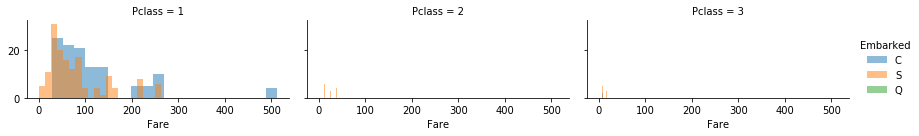

In [153]:
grid = sns.FacetGrid(titanic[titanic.Deck!='U'], col='Pclass', hue='Embarked'
                   ,height=2, aspect=2)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend()

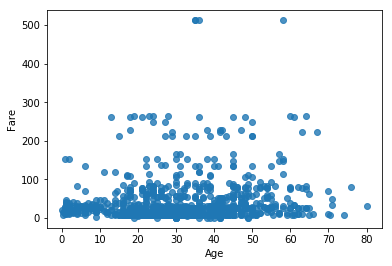

In [150]:
sns.regplot(x='Age', y='Fare', data=titanic,fit_reg=False)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


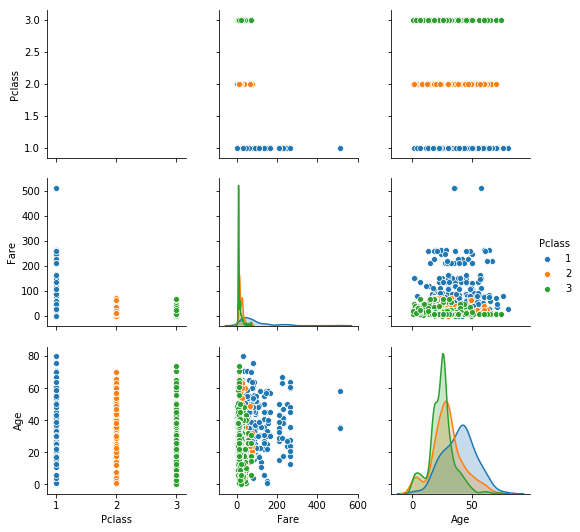

In [147]:
sns.pairplot(titanic.loc[:,['Pclass','Deck','Fare','Age','Embarked']], hue="Pclass")

In [82]:
len(np.arange(1001,1217))

216

In [86]:
# 이 티켓에 각 1001~1216까지 group_idx 값을 준다.
# Ticket 번호를 key로, group_idx를 value로 하는 딕셔너리 tgroup_idx를 만든다.

tgroup_idx = pd.DataFrame({
    'Ticket' : multitickets
    ,'group_idx' : np.arange(1001,1217)
}).set_index('Ticket')['group_idx'].to_dict()

In [96]:
# titanic 데이터에 group_idx 컬럼을 만든다. 
# 이 컬럼을 이용해 그룹핑을 하고 나중에 Deck 값을 채울 것이다. (같은 그룹은 같은 Deck에 머물렀다고 가정한다.)
titanic['group_idx'] = titanic.Ticket.map(tgroup_idx)
titanic['group_idx'].notna().sum()    # group에 속해 group_idx가 있는 승객은 총 596명이다.

596